Example 1: Comparing KRAS Proteins
===================================


In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1' 
import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
import sklearn.metrics

#from GW_prot import *


import sys
sys.path.insert(0,'../src')

from FGW_protein import *
import stress_comparison
sys.path.insert(0,'/home/elijah/pymol/lib/python3.10/site-packages') #just for pympler
from pympler import asizeof

/home/elijah/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/elijah/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/elijah/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

KRAS (Kirsten Rat Sarcoma) is a signalling protein involved in cell proliferation. In its off state it is bound to guanosine diphosphate (GDP). In its on state it is bound to guanosine triphosphate (GTP) and activates effector proteins which can bind to two flexible switch regions. Certain mutant forms of KRAS keep it in its on state which can cause proliferation, causing multiple types of cancer. Thus mutant forms of KRAS are potential targets for drugs to treat the cancers they cause.


This dataset consists of experimentally determined PDB files of KRAS retreived from [RCSB](https://www.rcsb.org), including both wild type and several missense mutants. Ligands, ions, and small molecules including potential drug candidates have been removed for clarity. All proteins were truncated to amino acids 2-162 in the [canonical sequence](https://www.uniprot.org/uniprotkb/P01116/entry#sequences) as some had missing data beyond that range. Files with multiple chains on RCSB were split into separate files in this dataset. 

In [2]:
dir = "../Examples/Examples Data/KRAS ends cut2/"

We start by creating `FGW_protein` objects for each KRAS protein.

In [3]:
protein_list = [FGW_protein.make_protein_from_pdb(pdb_file = os.path.join(dir, file))  for file in os.listdir(dir)]

We then initialize a `Stress_Comparison` object to compare these proteins using GW and their stresses.
In this example we store the transport plans in RAM for simplicity. This will use roughly 12.6 MB. 

In [4]:
A = stress_comparison.Stress_Comparison(prot_list = protein_list, RAM =  True)

We then run GW all-vs-all. On our computer with 16 parallel processes this take 5 seconds. With a single process it takes around 40 seconds. If we set `RAM = False` the computation time takes about 71 amd 81 seconds

In [5]:


print(asizeof.asizeof(A))
#11883784

11883784


In [6]:
%%time
A.GW_compute_stresses(processes = 16)
#5s

CPU times: user 1.26 s, sys: 849 ms, total: 2.11 s
Wall time: 5.35 s


In [7]:
%%time
#41s
A.GW_compute_stresses(processes = 1)

CPU times: user 55.2 s, sys: 122 ms, total: 55.3 s
Wall time: 55.3 s


In [8]:
print(asizeof.asizeof(A))
#609824272

609824272


In [9]:
print(asizeof.asizeof(A.transport_dict))
#593981552

593981552


In [10]:
B = stress_comparison.Stress_Comparison(prot_list = protein_list, RAM =  False, transport_dir= '.')

In [11]:
print(asizeof.asizeof(B))
#11759000

11759128


In [12]:
%%time
B.GW_compute_stresses(processes = 16)
#15s

CPU times: user 2.04 s, sys: 1.77 s, total: 3.81 s
Wall time: 59 s


In [13]:
%%time
#B.GW_compute_stresses(processes = 1)
#79s

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [14]:
print(asizeof.asizeof(B))
#15845936

19646832


We can study how the conformation of KRAS changes depending on the ligand it is bound to. The original PDB files contain KRAS bound to GDP and to the GTP-analogues GNP, GCP, and GSP.

In [15]:
ligand_list = ['GNP',  'GCP',  'GSP',  'GCP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GSP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GSP',  'GNP',  'GDP',  'GNP',  'GNP',  'GNP',  'GDP',  'GNP',  'GNP',  'GNP',  'GNP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP']

For this visual analysis, we will create a UMAP plot. The proteins in blue are those bound to GTP-analogues. The proteins in red, green, and purple are proteins bound to GDP, with the color determined by their cluster.

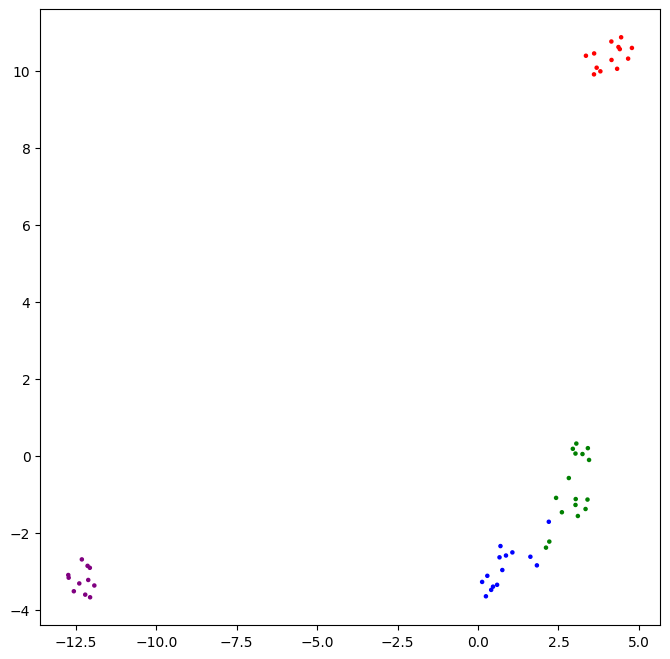

In [16]:
distance_matrix = A.get_GW_dmat()
reducer = UMAP(metric = 'precomputed', random_state=14)
embedding = reducer.fit_transform(distance_matrix)
    

group1 = [11, 34, 39, 40, 41, 42, 43, 44, 45, 46, 47] #purple
group2 = [4, 20,21,22,23,24,25,26,27,49,50,51,52] #red
group3 = [5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 30, 48, 53] #green
group4 = [0, 1, 2, 3, 19, 28, 29, 31, 32, 33, 35, 36, 37, 38] #blue


plt.figure(figsize=(8, 8))
plt.scatter([embedding[i, 0] for i in group1], [embedding[i, 1] for i in group1], c= ['purple']*11, s=5)
plt.scatter([embedding[i, 0] for i in group2], [embedding[i, 1] for i in group2], c= ['red']*13, s=5)
plt.scatter([embedding[i, 0] for i in group3], [embedding[i, 1] for i in group3], c= ['green']*16, s=5)
plt.scatter([embedding[i, 0] for i in group4], [embedding[i, 1] for i in group4], c= ['blue']*14, s=5)

plt.show()


Using pymol we can clearly see that these clusters reflect conformational differences between the proteins. In this image of switch region II we see that the four colors take have distinct conformations. We note that the blue and green groups are very close by both conformationationally and in the UMAP clustering, corresponding to the fact that they have they have low GW-distances. 


![Screenshot2.png](Screenshot2.png)

In this image of switch region I we see that most GTP-analogue-bound proteins (blue) have similar conformations and most GDP-bound proteins (red, green, and purple) have similar conformations distinct from the GTP-analogue-bound ones. 

![Screenshot1.png](Screenshot1.png)

Along with the different types of ligands, mutations, different drug candidates, and batch effects could contribute to the different conformations.

Next we use `pymol_protein_viewer.show_proteins_with_values` to visualize the proteins and the stress levels of different residues in the proteins. `A.raw_stress_levels` contains the stresses of all the pairwise calculations, so we first average them for each protein.

In [17]:
avg_stresses_dict =  stress_comparison.normalize_stress_dict( A.raw_stress_dict)
avg_stresses_list = [avg_stresses_dict[name] for name in A.name_list]

In [17]:
Bavg_stresses_dict =  stress_comparison.normalize_stress_dict( B.raw_stress_dict)
Bavg_stresses_list = [Bavg_stresses_dict[name] for name in B.name_list]

In [18]:
pymol_protein_viewer.show_proteins_with_values( infiles = [os.path.join(dir, file)  for file in os.listdir(dir)],     chain_ids = [ file[5]  for file in os.listdir(dir)],     data_lists = avg_stresses_list,     output_file = "KRAS ends cut stresses.pse")

The pymol file we generated and saved to `KRAS ends cut stresses.pse`can then be opened in a pymol GUI window. The switch I region is in the foreground at the upper left and the switch II region in the foreground center. We see that both have higher stress levels as indicated by the redder colors, whereas the non-switch regions have lower stress as indicated by yellows. 


![Screenshot3.png](Screenshot3.png)


Next we will test how well the stress levels can be used to predict the switch I and switch II regions. These regions do not have well-defined endpoints but we will choose to use residues 30-40 and 60-72 in the canonical indexing respectively. As these files do not contain all the residues the switch regions are at indices 28-38 and 58-74 instead. 

We display the precision-recall curve of a randomly selected protein and the mean average precision (area under precision-recall curve).

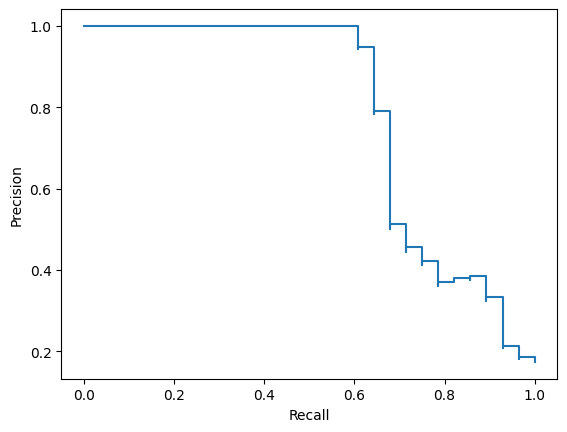

In [19]:
switch_regions_dict = {p.name : [ int(i in range(28,39) or i in range(58,75)) for i in range(161)] for p in protein_list}

p,r,_ = sklearn.metrics.precision_recall_curve(switch_regions_dict['5mla_A'],  avg_stresses_dict['5mla_A'])
sklearn.metrics.PrecisionRecallDisplay(precision = p, recall = r).plot()
plt.show()
avg_precision_dict = stress_comparison.get_AP_scores(avg_stresses_dict, switch_regions_dict, upper = True)

print(f'mean average precision = {np.mean(avg_precision_dict.values())})

We can also compute the transferred stresses with `raw_transferred_stresses` which we then need to average with `normal_stress_dict`. Transferring uses the calculated transport plans to transpose the stresses of one protein to another, and this is done in an all-to-all fashion. Generally this improves accuracy. 

In [20]:
%%time
transferred_stresses = stress_comparison.normalize_stress_dict( A.raw_transferred_stresses(avg_stresses_dict))

In [20]:
%%time
Btransferred_stresses = stress_comparison.normalize_stress_dict( B.raw_transferred_stresses(Bavg_stresses_dict))

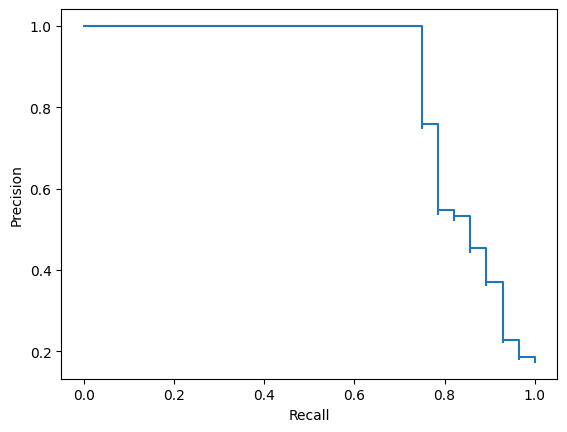

In [21]:
p,r,_ = sklearn.metrics.precision_recall_curve(switch_regions_dict['5mla_A'],  transferred_stresses['5mla_A'])
sklearn.metrics.PrecisionRecallDisplay(precision = p, recall = r).plot()
plt.show()

transferred_avg_precision_dict = stress_comparison.get_AP_scores(transferred_stresses, switch_regions_dict, upper = True)
print(f'mean average precision = {np.mean(transferred_avg_precision_dict.values())})

In [22]:
avg_precision_dict = stress_comparison.get_AP_scores(avg_stresses_dict, switch_regions_dict, upper = True)
transferred_avg_precision_dict = stress_comparison.get_AP_scores(transferred_stresses, switch_regions_dict, upper = True)

In [23]:

np.mean([avg_precision_dict[k]  for k in A.name_list])

0.8423611265528455

In [24]:

np.mean([transferred_avg_precision_dict[k]  for k in A.name_list])

0.8587374997410856